In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mne.io.snirf import read_raw_snirf
from get_events_from_snirf import get_events_from_snirf
import itertools

In [2]:
path_1 = '../data_hojjat/2021_08-Finger_Tapping-Hb.snirf'
path_2 = '../data_hojjat/arm_move/test_001_S001_3b7aaf4_5.snirf'
path_3 = '../data_hojjat/dec_nef/3/test_001_S001_7d1123e_5.snirf'

In [3]:
snirf = read_raw_snirf(path_2);

Loading /home/kernel/Desktop/py_test/project/data_hojjat/arm_move/test_001_S001_3b7aaf4_5.snirf


/home/kernel/Desktop/py_test/project/mne-python/mne/utils/check.py:91: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/home/kernel/Desktop/py_test/project/mne-python/mne/utils/check.py:91: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/home/kernel/Desktop/py_test/project/mne-python/mne/externals/pymatreader/pymatreader.py:34: DeprecationWarning: Please use `get_matfile_version` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.miobase` namespace is deprecated.
  from scipy.io.matlab.miobase import get_matfile_version


In [4]:
h_dict={}
for ch in snirf.ch_names:
    h_dict[ch] = 'fnirs_cw_amplitude'

In [5]:
snirf.set_channel_types(h_dict)

<RawSNIRF | test_001_S001_3b7aaf4_5.snirf, 4168 x 6037 (845.6 s), ~5.6 MB, data not loaded>

In [6]:
# snirf.get_montage()

In [7]:
# snirf.ch_names

In [8]:
import mne

In [9]:
# mne.viz.plot_montage(snirf.get_montage(), kind='3d');

In [10]:
snirf.to_data_frame().head()

,time,S00_D00d0 HbO,S24_D16d0 HbO,S00_D00d0 HbR,S24_D16d0 HbR,S00_D00d1 HbO,S24_D16d1 HbO,S00_D00d1 HbR,S24_D16d1 HbR,S00_D00d2 HbO,...,S24_D14d1 HbR,S49_D49d3 HbR,S24_D14d2 HbO,S49_D49d4 HbO,S24_D14d2 HbR,S49_D49d4 HbR,S24_D14d5 HbO,S49_D49d5 HbO,S24_D14d5 HbR,S49_D49d5 HbR
0,0,-0.979230,NaN,-0.051584,NaN,-1.717853,NaN,0.028450,NaN,-0.475103,...,NaN,-0.751467,NaN,-0.262092,NaN,1.368541,NaN,0.145856,NaN,0.482923
1,140,-1.122502,NaN,0.174264,NaN,-0.815759,NaN,-0.176200,NaN,-1.105202,...,NaN,1.059673,NaN,0.257207,NaN,-0.089621,NaN,0.655138,NaN,-0.167729
2,280,-0.494136,NaN,-0.056569,NaN,-0.546678,NaN,-0.086851,NaN,-0.416400,...,NaN,0.295904,NaN,0.375782,NaN,-0.520661,NaN,0.949559,NaN,-0.299308
3,420,-0.810002,NaN,0.021664,NaN,-1.125363,NaN,-0.067672,NaN,-0.599635,...,NaN,-0.073487,NaN,0.144545,NaN,-0.178211,NaN,0.792533,NaN,-0.634747
4,560,-1.048883,NaN,0.075108,NaN,-1.138561,NaN,0.041572,NaN,-0.737290,...,NaN,-0.011122,NaN,-0.361789,NaN,0.143802,NaN,0.545104,NaN,0.236618


In [11]:
# snirf.annotations.description

In [12]:
%matplotlib inline
%matplotlib widget

In [13]:
tstart = snirf.annotations.onset[(snirf.annotations.description) == 'StartBlock']

In [14]:
# snirf.plot(n_channels=len(snirf.ch_names[:2]), duration=120, show_scrollbars=False, scalings='auto', clipping=None, start=tstart);

In [15]:
events, event_dict = mne.events_from_annotations(snirf)

Used Annotations descriptions: ['StartBlock', 'StartExperiment', 'StartIti', 'StartRest', 'StartTrial']


In [16]:
events[0]

array([176,   0,   2])

In [17]:
event_dict

{'StartBlock': 1,
 'StartExperiment': 2,
 'StartIti': 3,
 'StartRest': 4,
 'StartTrial': 5}

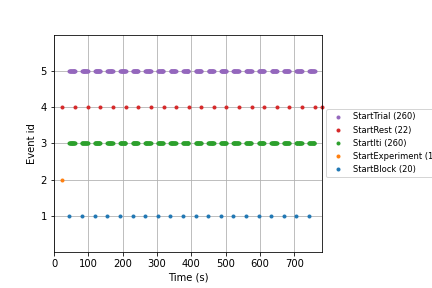

In [18]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=snirf.info['sfreq'])
fig.subplots_adjust(right=0.7)

In [19]:
tmin, tmax = -5, 15
epochs = mne.Epochs(snirf, events, event_id=event_dict, tmin=tmin, tmax=tmax, proj=True, baseline=(tmin, 0), preload=True, detrend=None, verbose=True, event_repeated='merge')

Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
538 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 538 events and 144 original time points ...
0 bad epochs dropped


In [20]:
epochs

Number of events,538
Events,StartBlock/StartIti: 20StartExperiment/StartRest: 1StartIti: 236StartIti/StartTrial: 4StartRest: 21StartTrial: 256
Time range,-5.044 – 14.991 sec
Baseline,-5.000 – 0.000 sec


In [21]:
single_snirf = snirf.copy()

In [22]:
channel_name = 'S13_D13d0'

S21_D21d0


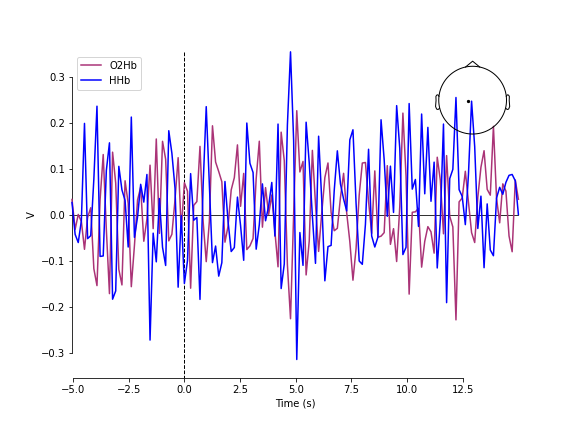

S21_D21d1


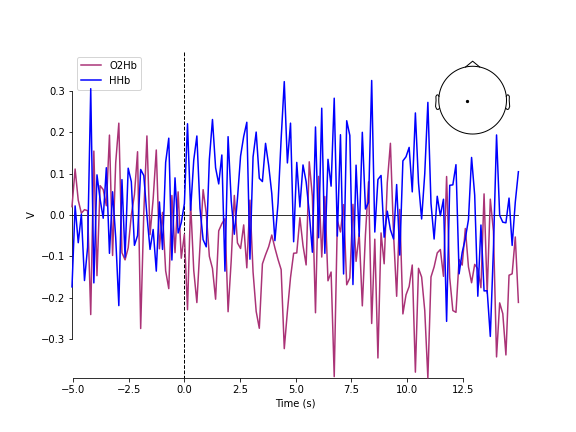

S21_D21d2


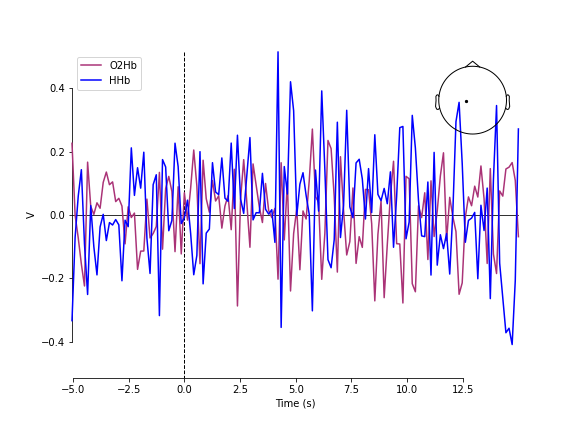

S21_D21d3


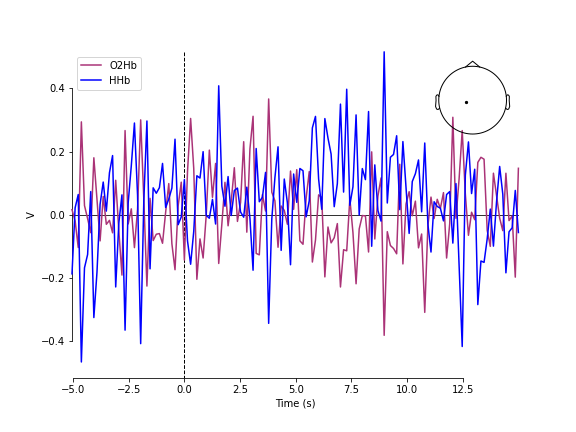

S21_D21d4


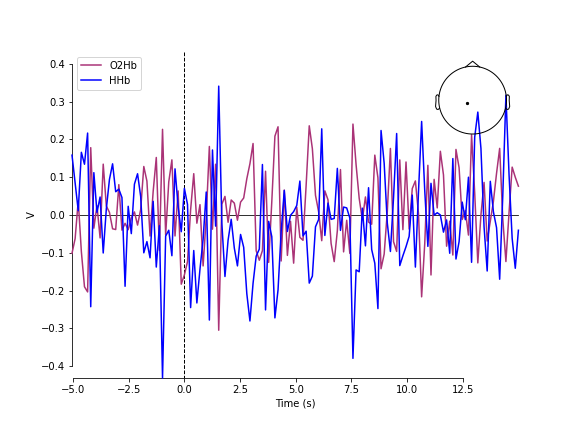

S21_D21d5


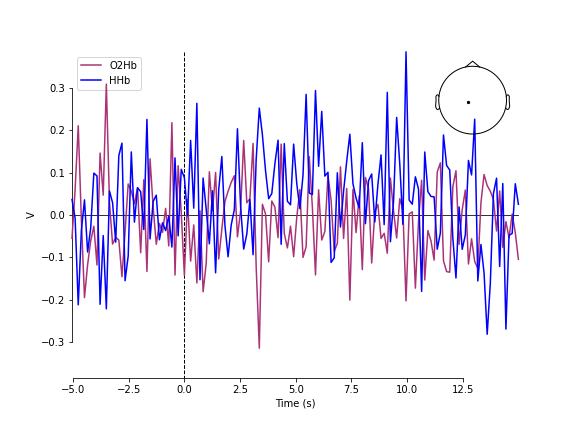

In [26]:
for i in range(6):
    single_snirf = snirf.copy()
    channel_name = 'S21_D21d'
    channel_name += str(i)
    print(channel_name)
    picks = mne.pick_channels_regexp(single_snirf.ch_names, regexp=channel_name)
    sep_ch = single_snirf.pick(picks)
    epochs_single = mne.Epochs(sep_ch, events, event_id=event_dict, tmin=tmin, tmax=tmax, proj=True, baseline=(tmin, 0), preload=True, detrend=None, verbose=False, event_repeated='merge')
    evoked_dict = {'O2Hb': epochs_single['StartRest'].average(picks=channel_name+' HbO'),
                   'HHb': epochs_single['StartRest'].average(picks=channel_name+' HbR')
                  }
    for condition in evoked_dict:
      evoked_dict[condition].rename_channels(lambda x: x[:-4])
    color_dict = dict(O2Hb='#AA3377', HHb='b')
    mne.viz.plot_compare_evokeds(evoked_dict, ci=0.95,
          colors=color_dict);
    

In [23]:
picks = mne.pick_channels_regexp(single_snirf.ch_names, regexp=channel_name)
picks

[2240, 2242]

In [24]:
type(snirf)

mne.io.snirf._snirf.RawSNIRF

In [25]:
# snirf.plot(order = picks, n_channels=len(picks), duration=10, show_scrollbars=True, scalings='auto', clipping=None, start=tstart, verbose=True);
sep_ch = single_snirf.pick(picks)

In [26]:
epochs_single = mne.Epochs(sep_ch, events, event_id=event_dict, tmin=tmin, tmax=tmax, proj=True, baseline=(tmin, 0), preload=True, detrend=None, verbose=True, event_repeated='merge')

Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
538 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 538 events and 144 original time points ...
0 bad epochs dropped


In [27]:
epochs_single.ch_names

['S21_D21d0 HbO', 'S21_D21d0 HbR']

In [28]:
evoked_dict = {'O2Hb': epochs_single['StartTrial'].average(picks=channel_name+' HbO'),
               'HHb': epochs_single['StartTrial'].average(picks=channel_name+' HbR')
              }

In [29]:
evoked_dict

{'O2Hb': <Evoked | '0.98 × StartTrial + 0.02 × StartIti/StartTrial' (average, N=260), -5.0436 – 14.991 sec, baseline -5 – 0 sec, 1 ch, ~1.7 MB>,
 'HHb': <Evoked | '0.98 × StartTrial + 0.02 × StartIti/StartTrial' (average, N=260), -5.0436 – 14.991 sec, baseline -5 – 0 sec, 1 ch, ~1.7 MB>}

In [30]:
for condition in evoked_dict:
  evoked_dict[condition].rename_channels(lambda x: x[:-4])

In [31]:
color_dict = dict(O2Hb='#AA3377', HHb='b')

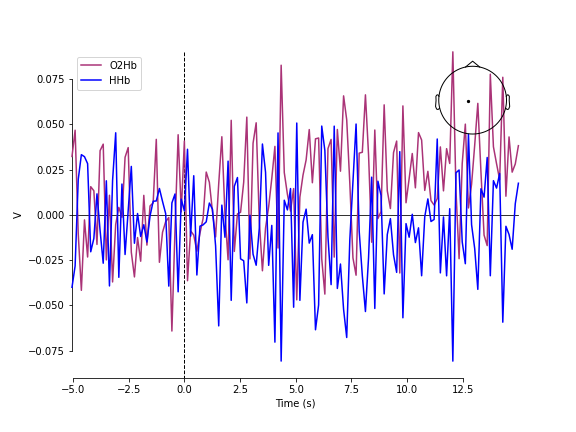

In [32]:
mne.viz.plot_compare_evokeds(evoked_dict, ci=0.95,
      colors=color_dict);

In [ ]:
epochs['StartBlock'].plot_image(combine='mean')

In [ ]:
sessions_dict = {'O2Hb': epochs_session1['StartBlock'].average(picks='hbo'),
   'O2Hb': epochs_session2['StartBlock'].average(picks='hbo'),
   'O2Hb': epochs_session3['StartBlock'].average(picks='hbo'),
   'HHb': epochs_session1['StartBlock'].average(picks='hbr'),
   'HHb': epochs_session2['StartBlock'].average(picks='hbr'),
   'HHb': epochs_session3['StartBlock'].average(picks='hbr')
  }

# Rename channels until the encoding of frequency in ch_name is fixed
for condition in sessions_dict:
   sessions_dict[condition].rename_channels(lambda x: x[:-4])
    
color_dict = dict(O2Hb='#AA3377', HHb='b')

mne.viz.plot_compare_evokeds(sessions_dict, ci=0.95,
   colors=color_dict, combine='mean');

In [33]:
from give_channels import give_channels
give_channels()

array(['S11_D11d0', 'S13_D11d0', 'S15_D11d0', 'S11_D11d1', 'S13_D11d1',
       'S15_D11d1', 'S11_D11d2', 'S13_D11d2', 'S11_D11d4', 'S11_D11d5',
       'S13_D11d5', 'S15_D11d5', 'S13_D12d0', 'S13_D12d1', 'S13_D12d2',
       'S21_D12d2', 'S12_D12d3', 'S13_D12d3', 'S21_D12d3', 'S13_D12d4',
       'S21_D12d4', 'S13_D12d5', 'S11_D13d0', 'S12_D13d0', 'S13_D13d0',
       'S15_D13d0', 'S20_D13d0', 'S21_D13d0', 'S11_D13d1', 'S12_D13d1',
       'S13_D13d1', 'S15_D13d1', 'S21_D13d1', 'S11_D13d2', 'S12_D13d2',
       'S13_D13d2', 'S15_D13d2', 'S21_D13d2', 'S11_D13d3', 'S12_D13d3',
       'S13_D13d3', 'S15_D13d3', 'S21_D13d3', 'S23_D13d3', 'S12_D13d4',
       'S13_D13d4', 'S15_D13d4', 'S20_D13d4', 'S21_D13d4', 'S23_D13d4',
       'S29_D13d4', 'S12_D13d5', 'S13_D13d5', 'S15_D13d5', 'S20_D13d5',
       'S21_D13d5', 'S11_D15d0', 'S13_D15d0', 'S15_D15d0', 'S17_D15d0',
       'S21_D15d0', 'S23_D15d0', 'S25_D15d0', 'S13_D15d1', 'S15_D15d1',
       'S17_D15d1', 'S21_D15d1', 'S23_D15d1', 'S25_D15d1', 'S13_

In [ ]:
import os.path as op
from itertools import compress 

In [ ]:
fnirs_data_folder = mne.datasets.fnirs_motor.data_path()

In [ ]:
fnirs_cw_amplitude_dir = op.join(fnirs_data_folder, 'Participant-1')

In [ ]:
raw_intensity = mne.io.read_raw_nirx(fnirs_cw_amplitude_dir, verbose=True)

In [ ]:
(raw_intensity.get_channel_types())

In [ ]:
len(['fnirs_cw_amplitude' for _ in range(len(snirf.ch_names))])

In [ ]:
h_dict={}
for ch in snirf.ch_names:
    h_dict[ch] = 'fnirs_cw_amplitude'

In [ ]:
snirf.set_channel_types(h_dict)

In [ ]:
raw_intensity.load_data()

In [ ]:
raw_intensity.plot(n_channels=2)